# WiFi usage data
Objective:
The objective of this time series analysis is to forecast the usage of WiFi over a period of time and predict the expected increase or decrease in internet usage in the upcoming months. By analyzing historical WiFi usage data, we aim to develop a predictive model that can accurately forecast future trends in internet usage. 

Problem Statement:
The problem at hand is to analyze the historical usage patterns of WiFi and predict the future demand for internet services. The dataset contains information about WiFi usage over a specific timeframe, including metrics such as data usage, number of connected devices, and peak usage hours. The goal is to leverage this data to develop a time series forecasting model that can accurately predict future WiFi usage.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import os
os.chdir('D:/py/')

import pandas as pd
df=pd.read_csv('wifi_data.csv')
df

,Download Bytes,Upload Bytes,Total,Date
0,7.12 GB,3.32 GB,10.44 GB,30-01-2024
1,22.96 GB,11.45 GB,34.4 GB,29-01-2024
2,20.08 GB,758.73 MB,20.82 GB,28-01-2024
3,12.01 GB,918.13 MB,12.91 GB,27-01-2024
4,13.81 GB,405.41 MB,14.21 GB,26-01-2024
...,...,...,...,...
167,15.95 GB,869.01 MB,16.8 GB,07-08-2023
168,6.59 GB,318.56 MB,6.9 GB,06-08-2023
169,14.43 GB,360.17 MB,14.78 GB,05-08-2023
170,15.93 GB,7.18 GB,23.11 GB,04-08-2023


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Download Bytes  172 non-null    object
 1   Upload Bytes    172 non-null    object
 2   Total           172 non-null    object
 3   Date            172 non-null    object
dtypes: object(4)
memory usage: 5.5+ KB


In [3]:
df['Total']=df['Total'].str.replace(' GB', '').str.replace(' MB', '').astype(float).astype(int)

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.index = df['Date']
df.head(2)

,Download Bytes,Upload Bytes,Total,Date
Date,,,,
2024-01-30,7.12 GB,3.32 GB,10,2024-01-30
2024-01-29,22.96 GB,11.45 GB,34,2024-01-29


In [5]:
df.drop(['Date','Download Bytes','Upload Bytes'],axis=1,inplace=True)
df.head(2)

,Total
Date,
2024-01-30,10
2024-01-29,34


In [6]:
df.columns=['Total_GB_MB']
df.head(2)

,Total_GB_MB
Date,
2024-01-30,10
2024-01-29,34


In [7]:
# Decompose

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sd=seasonal_decompose(df)

sd.plot()

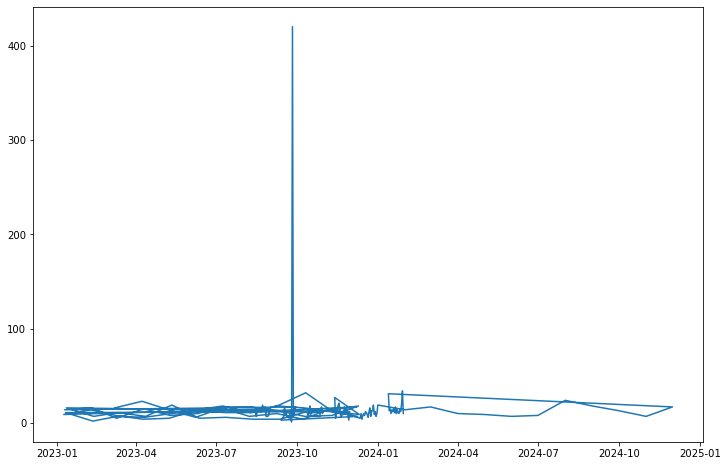

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df['Total_GB_MB'])
plt.show()

In [11]:
# Forecasting

In [18]:
from pmdarima.arima import auto_arima

model = auto_arima(df['Total_GB_MB'],seasonal=True, suppress_warnings=True, m=4 )

In [19]:
Forecast, cnf = model.predict(n_periods=12, return_conf_int=True)
Forecast = pd.Series(Forecast)

C:\Users\Ankita\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
lower= cnf[ : , 0]
lower=pd.Series(lower)
lower.index=Forecast.index

In [21]:
upper= cnf[ : , 1]
upper=pd.Series(upper)
upper.index=Forecast.index

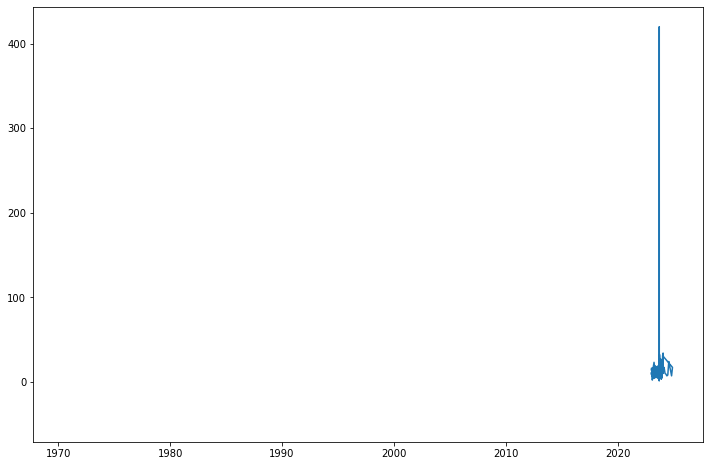

In [22]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.plot(Forecast)
plt.plot(lower)
plt.plot(upper)

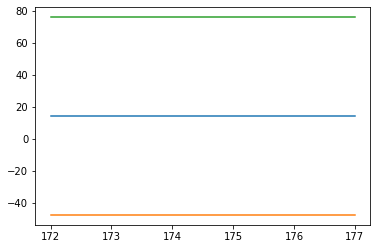

In [17]:
plt.plot(Forecast)
plt.plot(lower)
plt.plot(upper)